In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/Processed_Data/Final_Dataset_After_Feature_Engineering.csv')

In [3]:
df

,Unnamed: 0,Batting_Team,Bowling_team,City,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
0,30371,Sunrisers Hyderabad,Mumbai Indians,Chennai,26,16,5,151,7.211538,9.750000,0
1,201774,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,35,19,4,179,8.554455,11.052632,0
2,160114,Chennai Super Kings,Mumbai Indians,Mumbai,78,57,8,165,8.285714,8.210526,0
3,175289,Chennai Super Kings,Delhi Daredevils,Delhi,77,56,8,186,10.218750,8.250000,1
4,188325,Deccan Chargers,Chennai Super Kings,Durban,155,114,10,166,11.000000,8.157895,1
...,...,...,...,...,...,...,...,...,...,...,...
92576,194698,Chennai Super Kings,Royal Challengers Bangalore,Chennai,25,17,4,127,5.941748,8.823529,0
92577,124310,Mumbai Indians,Kolkata Knight Riders,Abu Dhabi,121,69,8,164,5.058824,10.521739,0
92578,97980,Kolkata Knight Riders,Rajasthan Royals,Mumbai,53,24,4,200,9.187500,13.250000,0
92579,101499,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,163,116,9,168,7.500000,8.431034,0


In [4]:
LogReg = pickle.load(open('LogReg.pkl', 'rb'))
Rf = pickle.load(open('Rf.pkl', 'rb'))
dt_clf = pickle.load(open('dt_clf.pkl', 'rb'))

season = input("Enter IPL Season: ")
sel_team = input("Enter a team: ")
batting_team = input("Enter batting team: ")
bowling_team = input("Enter bowling team: ")
selected_city = input("Select Host City: ")
target = int(input("Enter target: "))
score = int(input("Enter current score: "))
overs = int(input("Enter number of overs completed: "))
wickets_out = int(input("Enter number of wickets down: "))
classifier_name = input("Enter classifier name: ")

Enter IPL Season: 2021
Enter a team: Chennai Super Kings
Enter batting team: Mumbai Indians
Enter bowling team: Chennai Super Kings
Select Host City: Mumbai
Enter target: 200
Enter current score: 156
Enter number of overs completed: 15
Enter number of wickets down: 3
Enter classifier name: Logistics Regression


In [6]:
runs_left = target - score
balls_left = 120 - (overs * 6)
wickets_left = 10 - wickets_out
crr = score / overs
rrr = (runs_left * 6) / (balls_left)

input_df=pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],
    'city':[selected_city],'runs_left':[runs_left],'balls_left': [balls_left],
    'wickets':[wickets_left],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]},columns=LogReg[0]._df_columns.tolist())
input_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
0,Mumbai Indians,Chennai Super Kings,Mumbai,44,30,7,200,10.4,8.8


In [7]:
if classifier_name=="Logistic Regression":
    result=LogReg.predict_proba(input_df)
elif classifier_name=="Random Forest":
    result=Rf.predict_proba(input_df)
else:
    result=dt_clf.predict_proba(input_df)

(-1.1107361535545845,
 1.2046929967504776,
 -1.112469929338959,
 1.1485931812723198)

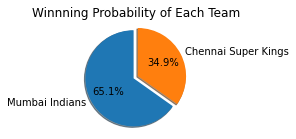

In [8]:
loss=result[0][0]
win=result[0][1]
    # st.header(batting_team + "-" + str(round(win*100)) +'%')
    # st.header(bowling_team + "-" + str(round(loss*100)) +'%')
    

labels = [batting_team,bowling_team]
sizes = [win,loss]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(2,2))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
ax1.set_title('Winning Probability of Each Team')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

In [ ]:
#LogReg[0].get_feature_names()

In [ ]:
#LogReg[0].get_params()